In [41]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DIR = "./UTKFace"
files = os.listdir(DIR)

In [3]:
data = pd.read_csv('UTKFace.csv', index_col=False, usecols=["gender","race","age"])

X = data[['gender', 'race']]
y = data['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeClassifier()  # Initialize the model
model.fit(X_train, y_train)  # Train the model
predictions = model.predict(X_test)  # Make predictions
accuracy = accuracy_score(y_test, predictions)  # Compute accuracy
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.09955705547352879


<AxesSubplot: xlabel='age', ylabel='count'>

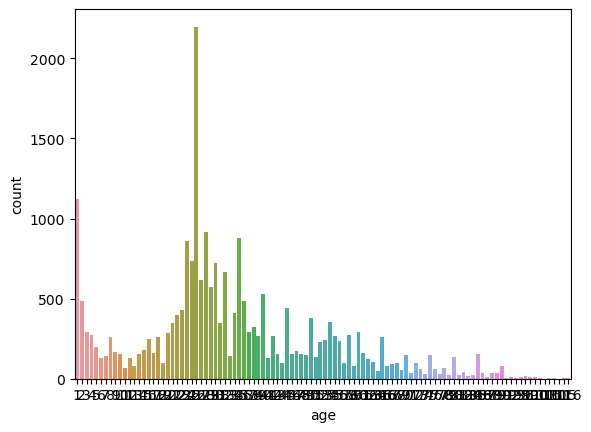

In [11]:
sns.countplot(data=data, x="age")

<AxesSubplot: xlabel='race', ylabel='count'>

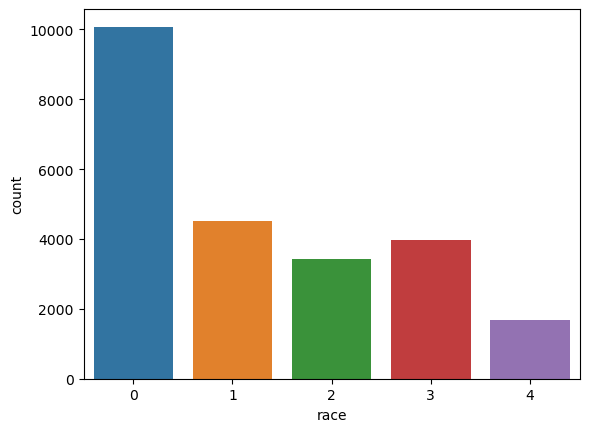

In [12]:
sns.countplot(data=data, x="race")


<AxesSubplot: xlabel='gender', ylabel='count'>

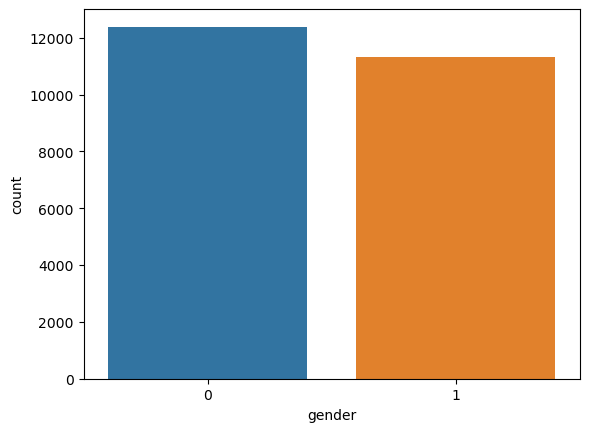

In [13]:
sns.countplot(data=data, x="gender")


In [16]:
data["age"].value_counts(sort="desc")

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [27]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

In [31]:
data["age_range"] = data.apply(lambda row: age_group(row.age), axis=1)

In [33]:
X = data[['gender', 'race']]
y = data['age_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()  # Initialize the model
model.fit(X_train, y_train)  # Train the model
predictions = model.predict(X_test)  # Make predictions
accuracy = accuracy_score(y_test, predictions)  # Compute accuracy
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.5205652815861632


[Text(0.4230769230769231, 0.9166666666666666, 'gender <= 0.5\ngini = 0.642\nsamples = 100.0%\nvalue = [0.179, 0.324, 0.469, 0.027]'),
 Text(0.15384615384615385, 0.75, 'race <= 0.5\ngini = 0.593\nsamples = 52.2%\nvalue = [0.164, 0.255, 0.561, 0.02]'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.553\nsamples = 23.1%\nvalue = [0.17, 0.178, 0.621, 0.031]'),
 Text(0.23076923076923078, 0.5833333333333334, 'race <= 1.5\ngini = 0.611\nsamples = 29.1%\nvalue = [0.159, 0.316, 0.514, 0.011]'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.546\nsamples = 9.8%\nvalue = [0.056, 0.383, 0.551, 0.01]'),
 Text(0.3076923076923077, 0.4166666666666667, 'race <= 2.5\ngini = 0.631\nsamples = 19.3%\nvalue = [0.212, 0.281, 0.495, 0.012]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.67\nsamples = 6.5%\nvalue = [0.335, 0.232, 0.404, 0.029]'),
 Text(0.38461538461538464, 0.25, 'race <= 3.5\ngini = 0.591\nsamples = 12.8%\nvalue = [0.149, 0.307, 0.541, 0.003]'),
 Text(0.3076923076923077, 0.08

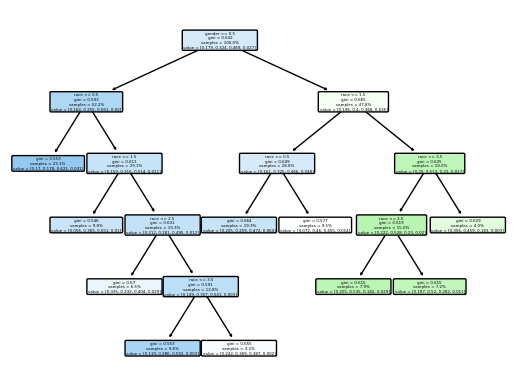

In [42]:
tree.plot_tree(model, filled=True, proportion=True, rounded=True, feature_names=["gender","race"], class_names=["Underage","Young Adult","Adult","Old"]) 